<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterator

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta 
import os
import re 

from functools import reduce
from collections import defaultdict

# customer analysis

In [3]:
os.listdir()

['.config',
 'scanner_data.csv',
 'ecommerce-data.csv',
 '1_orders_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail_II.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'test.csv',
 'mall_customers.csv',
 '1_order_payments_dataset.csv',
 '1_customers_dataset.csv',
 'sample_data']

In [48]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
df.columns = [re.sub(' ', '_', re.sub('\s\(.+\)$', '', a)).lower() for a in df.columns]
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


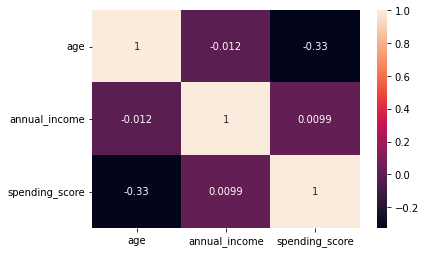

In [53]:
sns.heatmap(df.drop(['customerid'], axis = 1).corr(), annot = True)

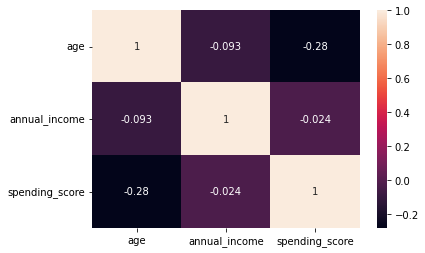

In [54]:
sns.heatmap(df[df.gender == 'Male'].drop(['customerid'], axis = 1).corr(), annot = True)

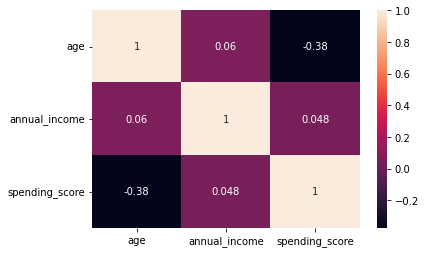

In [55]:
sns.heatmap(df[df.gender == 'Female'].drop(['customerid'], axis = 1).corr(), annot = True)

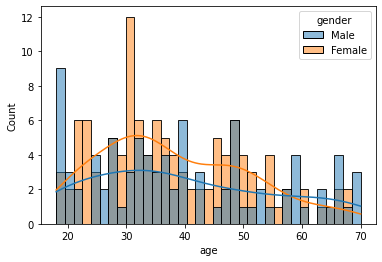

In [57]:
sns.histplot(df, x = 'age', kde = True, bins = 35, hue = 'gender')

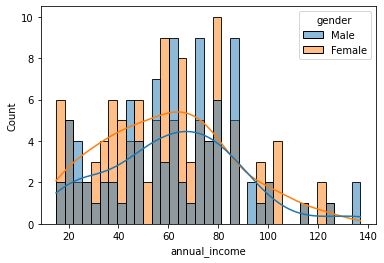

In [58]:
sns.histplot(df, x = 'annual_income', kde = True, bins = 35, hue = 'gender')

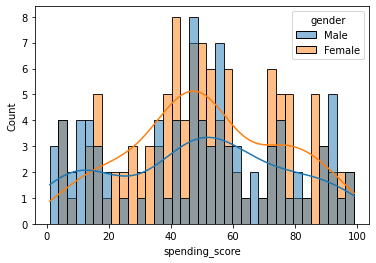

In [59]:
sns.histplot(df, x = 'spending_score', kde = True, bins = 35, hue = 'gender')

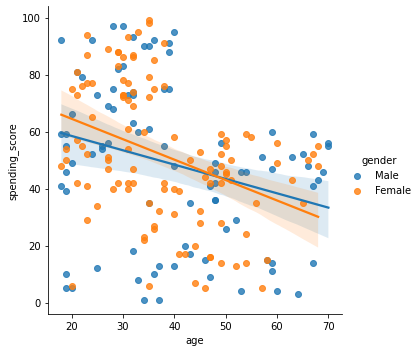

In [61]:
sns.lmplot(data = df, x = 'age', y = 'spending_score', hue = 'gender')

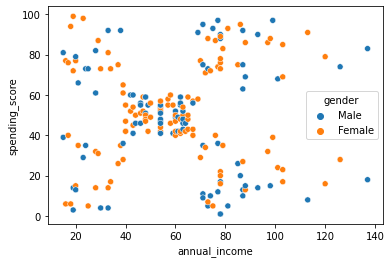

In [62]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'gender')

# iterator

In [63]:
mat = [list('ABC'), list('DEF'), list('GHI')]
a = {letter : [r, c] for r, rows in enumerate(mat) for c, letter in enumerate(rows)}

arr = np.empty([3,3], dtype = 'object')

for k, v in a.items() :
  arr[v[0], v[1]] = k

arr

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)

In [71]:
names = np.random.choice(['kim', 'park', 'lee'], 100, replace = True)
rev = np.random.normal(2000, 1000, 100).round()
score = np.random.normal(70, 20, 100).round()
b = pd.DataFrame({'name' : names, 'rev' : rev, 'score' : score})
b = b.assign(score = np.where(b['score'] >= 100, 100, b['score']))
b.head()

,name,rev,score
0,kim,1980.0,58.0
1,lee,1920.0,66.0
2,park,2051.0,76.0
3,park,1138.0,74.0
4,kim,2578.0,64.0


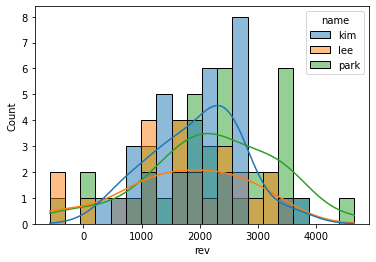

In [76]:
sns.histplot(data = b, x = 'rev', hue = 'name', kde = True, bins = 20)

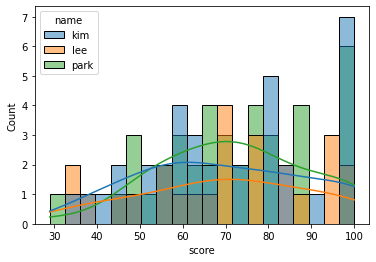

In [77]:
sns.histplot(data = b, x = 'score', hue = 'name', kde = True, bins = 20)

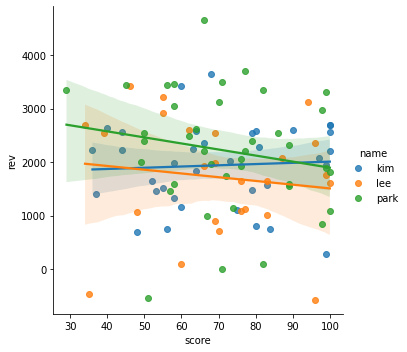

In [82]:
sns.lmplot(data = b, x = 'score', y = 'rev', hue = 'name')

In [83]:
res_score = defaultdict(list)
res_rev = defaultdict(list)

for i in range(len(b)) :
  res_score[b['name'][i]].append(b['score'][i])
  res_rev[b['name'][i]].append(b['rev'][i])

print(res_score)
print(res_rev)

defaultdict(<class 'list'>, {'kim': [58.0, 64.0, 37.0, 90.0, 84.0, 53.0, 55.0, 44.0, 64.0, 80.0, 68.0, 52.0, 73.0, 75.0, 56.0, 81.0, 79.0, 80.0, 63.0, 60.0, 100.0, 79.0, 36.0, 40.0, 100.0, 97.0, 100.0, 48.0, 60.0, 44.0, 99.0, 83.0, 99.0, 100.0, 58.0, 66.0], 'lee': [66.0, 69.0, 35.0, 70.0, 87.0, 55.0, 77.0, 60.0, 96.0, 62.0, 76.0, 94.0, 83.0, 39.0, 100.0, 83.0, 76.0, 69.0, 46.0, 69.0, 55.0, 99.0, 34.0, 96.0, 48.0], 'park': [76.0, 74.0, 99.0, 99.0, 56.0, 68.0, 45.0, 62.0, 89.0, 66.0, 89.0, 79.0, 71.0, 58.0, 70.0, 72.0, 64.0, 57.0, 98.0, 50.0, 100.0, 86.0, 100.0, 29.0, 49.0, 82.0, 58.0, 77.0, 76.0, 67.0, 89.0, 82.0, 50.0, 58.0, 71.0, 66.0, 77.0, 51.0, 98.0]})
defaultdict(<class 'list'>, {'kim': [1980.0, 2578.0, 1405.0, 2601.0, 749.0, 1457.0, 1513.0, 2572.0, 1828.0, 2584.0, 3647.0, 1651.0, 2023.0, 1112.0, 751.0, 2281.0, 1481.0, 802.0, 2249.0, 3414.0, 2210.0, 2536.0, 2235.0, 2640.0, 2699.0, 2068.0, 2690.0, 689.0, 1157.0, 2218.0, 279.0, 1574.0, 1945.0, 2564.0, 1336.0, 2351.0], 'lee': [1920.0

In [85]:
{k : sum(v) for k, v in res_rev.items()}

{'kim': 69869.0, 'lee': 42992.0, 'park': 86304.0}

In [87]:
{k : np.mean(v) for k, v in res_rev.items()}

{'kim': 1940.8055555555557, 'lee': 1719.68, 'park': 2212.923076923077}

In [88]:
{k : np.std(v) for k, v in res_rev.items()}

{'kim': 764.0860851531661,
 'lee': 1064.3029162790074,
 'park': 1086.8654148422777}